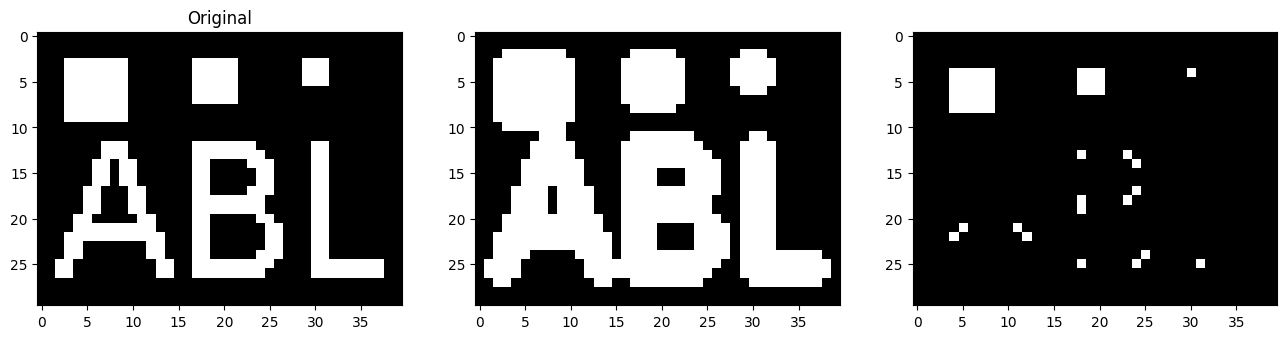

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im=cv.imread('C:/Users/Mystery/.ipython/morpho.tif', 0)
assert im is not None

se = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))
dilated = cv.dilate(im,se)
eroded = cv.erode(im, se)

fig, ax = plt.subplots(1,3, figsize=(16, 40))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(dilated, cmap='gray')
ax[2].imshow(eroded, cmap='gray')


plt.show()

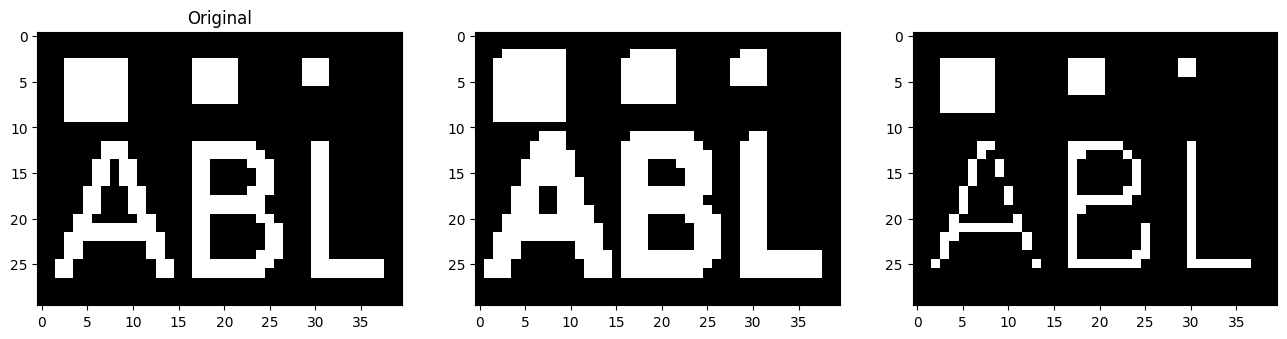

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im=cv.imread('C:/Users/Mystery/.ipython/morpho.tif', 0)
assert im is not None

se = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))
se = np.array([[0,0,0], [0,1,1], [0,1,0]], np.uint8)
dilated = cv.dilate(im,se)
eroded = cv.erode(im, se)

fig, ax = plt.subplots(1,3, figsize=(16, 40))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(dilated, cmap='gray')
ax[2].imshow(eroded, cmap='gray')


plt.show()

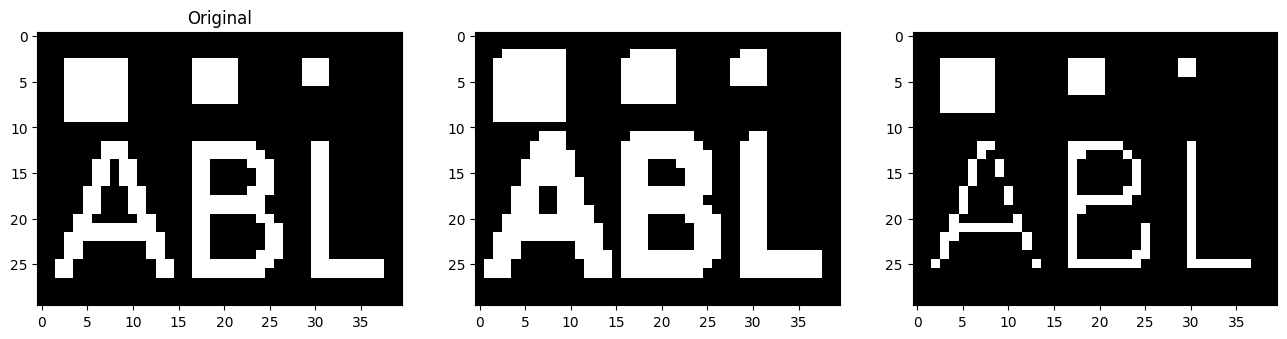

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im=cv.imread('C:/Users/Mystery/.ipython/morpho.tif', 0)
assert im is not None

retval, lables, stats, centroids = cv.connectedComponentsWithStats(im)
lables = cv.normalize(lables, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
indexed = cv.applyColorMap(lables, cv.COLORMAP_JET)

fig, ax = plt.subplots(1,3, figsize=(16, 40))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(dilated, cmap='gray')
ax[2].imshow(eroded, cmap='gray')


plt.show()

retval 99


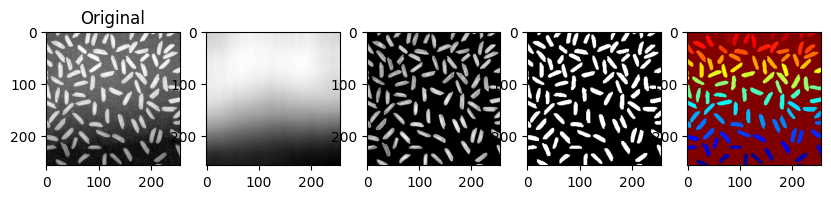

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im=cv.imread('C:/Users/Mystery/.ipython/rice.png', 0)
assert im is not None

blurred = cv.GaussianBlur(im, (101,101), 31)
diff = cv.subtract(im, blurred)
retvalue, thresholded = cv.threshold(diff, 0, 255, cv.THRESH_OTSU)
se = np.ones((3,3), np.uint8)
thresholded = cv.morphologyEx(thresholded, cv.MORPH_OPEN, se)

retval, lables, stats, centroids = cv.connectedComponentsWithStats(thresholded)
lables = cv.normalize(lables, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)
indexed = cv.applyColorMap(lables, cv.COLORMAP_JET)
print('retval', retval)


fig, ax = plt.subplots(1,5, figsize=(10, 20))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(blurred, cmap='gray')
ax[2].imshow(diff, cmap='gray')
ax[3].imshow(thresholded, cmap='gray')
ax[4].imshow(indexed, cmap='gray')

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

m = 2
c = 1
x = np.arange(1, 11,1)
n = np.random.randn(len(x))
y = m*x + c + n

X = np.concatenate([x.reshape(len(x), 1), np.ones((len(x), 1))], axis=1)
B = np.linalg.pinv(X,T @ X) @ X,T @ y
mstar = B[0]
bstar = B[1]

x0, xn = X[0], X[-1]
y0, yn = m*x0 + b, m*xn + b
y0_star, yn_star = mstar*x0 + bstar, mstar*xn + bstar
plt.plot([x0,xn], [y0, yn], lable='True line')
plt.plot([x0,xn], [y0_star, yn_star], lable='Estimated')
plt.plot(x, y, 'o', lable='Noisy')
plt.legend(loc='best')
plt.show()


NameError: name 'T' is not defined

In [36]:
!jupyter nbconvert --to html ex5.ipynb

[NbConvertApp] Converting notebook ex5.ipynb to html
[NbConvertApp] Writing 976053 bytes to ex5.html


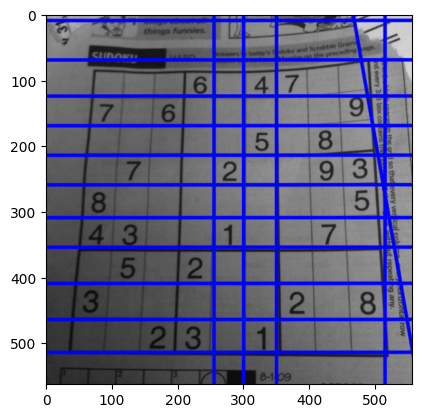

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im=cv.imread('C:/Users/Mystery/.ipython/sudoku.png', 0)
canny = cv.Canny(im, 50, 100)
assert im is not None


color_im = cv.cvtColor(im, cv.COLOR_GRAY2BGR)

lines = cv.HoughLines(canny, 5, 10*np.pi/180, 500, None, 0, 0)
#lines = cv.HoughLinesP(canny, 5, 10*np.pi/180, 50, None, 80, 10)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0, y0 = a*rho, b*rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(color_im, pt1,pt2,(0, 0, 255), 3, cv.LINE_AA)

plt.imshow(color_im)
plt.show()




In [34]:
import cv2 as cv
import numpy as np

im=cv.imread('C:/Users/Mystery/.ipython/pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
templ = cv.imread('C:/Users/Mystery/.ipython/templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None
assert templ is not None

im_edges = cv.Canny(im, 50, 250)
temple_edges = cv.Canny(im, 50, 250)
